In [1]:
#subir el archivo train.csv desde la computadora local al entorno de ejecución del notebook en la nube.
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [2]:
#Librerias básicas para la exploración
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#muestra las cinco primeras filas del archivo
df = pd.read_csv("train.csv")
df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [5]:
#información de cuantas columnas y filas hay : 692.500 filas--21 columnas--
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

In [6]:
#estadisticas basicas(promedios, minimos,máximos,vericar si hay columnas numericas)
df.describe()

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000,692500.000000
mean,494606.130576,20198.366679,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,0.314000,0.309000,0.293000,0.303000
max,989286.000000,20213.000000,0.657000,0.487000,0.320000,0.332000


In [8]:
#Información de las columnas
#verificando la existencia de las columnas que nos ayudaran a identificar a cada estudainte(ID) y a predecir mas adelante (RENDIMIENTO_GLOBAL)
df.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [9]:
#Cuantos estudiantes hay en cada clase
df['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


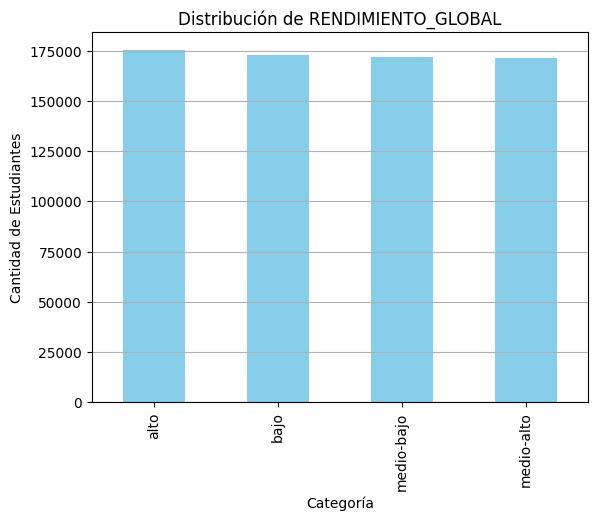

In [10]:
#información de cada clase de forma visual
df['RENDIMIENTO_GLOBAL'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Estudiantes")
plt.grid(axis='y')
plt.show()

In [11]:
#información de cada clase-porcentaje
df['RENDIMIENTO_GLOBAL'].value_counts(normalize=True) * 100

,proportion
RENDIMIENTO_GLOBAL,
alto,25.360144
bajo,24.980072
medio-bajo,24.877256
medio-alto,24.782527


In [13]:
#conteo de cuántos estudiantes hay por departamento del programa académico

df['ESTU_PRGM_DEPARTAMENTO'].value_counts()


,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


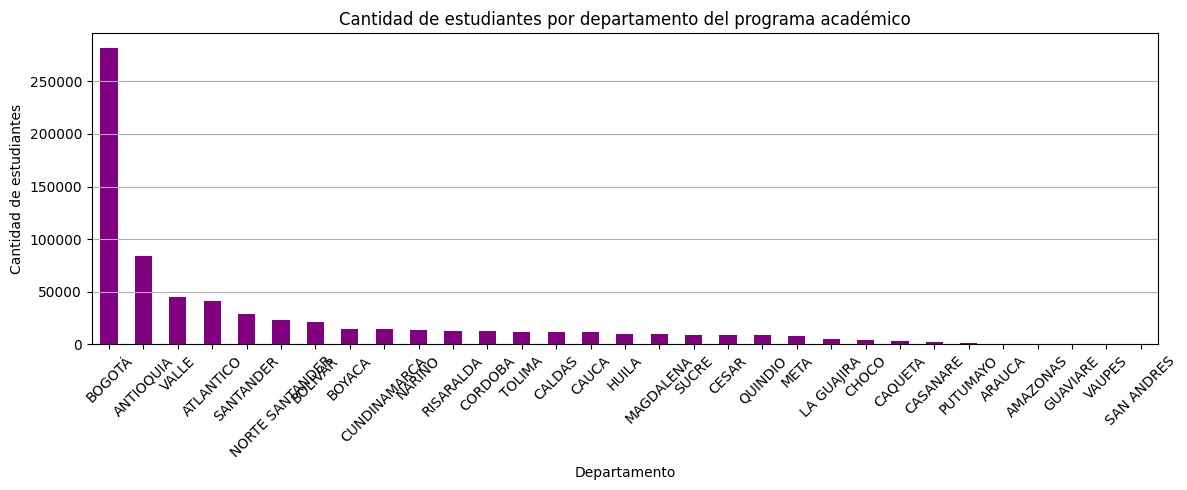

In [14]:
#mostramos una grafica de cuántos estudiantes hay por departamento del programa académico
df['ESTU_PRGM_DEPARTAMENTO'].value_counts().plot(kind='bar', figsize=(12, 5), color='purple')
plt.title("Cantidad de estudiantes por departamento del programa académico")
plt.xlabel("Departamento")
plt.ylabel("Cantidad de estudiantes")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [15]:
#verificando si hay valores nulos
df.isnull().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


In [16]:
#Verificar valores nulos por columna
df.isnull().sum().sort_values(ascending=False)

,0
FAMI_TIENEAUTOMOVIL,43623
FAMI_TIENELAVADORA,39773
FAMI_TIENECOMPUTADOR,38103
FAMI_ESTRATOVIVIENDA,32137
ESTU_HORASSEMANATRABAJA,30857
FAMI_TIENEINTERNET.1,26629
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONMADRE,23664
FAMI_EDUCACIONPADRE,23178
ESTU_PAGOMATRICULAPROPIO,6498


In [17]:
#Ver tipos de datos únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

ID: 692500 valores únicos
PERIODO: 9 valores únicos
ESTU_PRGM_ACADEMICO: 948 valores únicos
ESTU_PRGM_DEPARTAMENTO: 31 valores únicos
ESTU_VALORMATRICULAUNIVERSIDAD: 8 valores únicos
ESTU_HORASSEMANATRABAJA: 5 valores únicos
FAMI_ESTRATOVIVIENDA: 7 valores únicos
FAMI_TIENEINTERNET: 2 valores únicos
FAMI_EDUCACIONPADRE: 12 valores únicos
FAMI_TIENELAVADORA: 2 valores únicos
FAMI_TIENEAUTOMOVIL: 2 valores únicos
ESTU_PRIVADO_LIBERTAD: 2 valores únicos
ESTU_PAGOMATRICULAPROPIO: 2 valores únicos
FAMI_TIENECOMPUTADOR: 2 valores únicos
FAMI_TIENEINTERNET.1: 2 valores únicos
FAMI_EDUCACIONMADRE: 12 valores únicos
RENDIMIENTO_GLOBAL: 4 valores únicos
coef_1: 375 valores únicos
coef_2: 342 valores únicos
coef_3: 196 valores únicos
coef_4: 276 valores únicos


In [18]:
#Ver ejemplos de los valores de las columnas categóricas
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts().head(5))


Columna: ESTU_PRGM_ACADEMICO
ESTU_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
Name: count, dtype: int64

Columna: ESTU_PRGM_DEPARTAMENTO
ESTU_PRGM_DEPARTAMENTO
BOGOTÁ       282159
ANTIOQUIA     83607
VALLE         44588
ATLANTICO     41020
SANTANDER     28828
Name: count, dtype: int64

Columna: ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Name: count, dtype: int64

Columna: ESTU_HORASSEMANATRABAJA
ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
N

In [19]:
#Guardar una copia del DataFrame limpio
df.to_csv("train_limpio.csv", index=False)